In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress


In [37]:
earnings_data = pd.read_csv('data/B24021_median_earnings_occupation_5YALL_-688641291965021816.csv')
inspection_df = pd.read_csv('data/Code_Complaints_and_Violations_20240704.csv')
#crime_df = pd.read_csv('data/SPD_Crime_Data__2008-Present_20240704.csv')
housing_data = pd.read_csv('data/DP04_5YALL_3840298254942809598.csv')
zillow_housing = pd.read_csv('data/Neighborhood_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
census = pd.read_csv('data/2020_Census_Tracts_Seattle_-7486928068189135549.csv')
call_data = pd.read_csv('data/Call_Data_20240715.csv')

In [38]:
#earnings_data.head()
earnings_data.columns = earnings_data.columns.str.lower().str.strip().str.replace(' ','_')
earnings_data = earnings_data.rename(columns={'community_reporting_area_neighborhoods':'neighborhood'})
earnings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2276 entries, 0 to 2275
Data columns (total 82 columns):
 #   Column                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                         --------------  -----  
 0   objectid                                                                                                                       2276 non-null   int64  
 1   geoid                                                                                                                          2276 non-null   int64  
 2   tract_name                                                                                                                     2276 non-null   object 
 3   median_earnings_of_total_full-time_year-round_civilian_employed_population_16_years_and_over_with_earnings  

In [39]:
earnings_data.head()

,objectid,geoid,tract_name,median_earnings_of_total_full-time_year-round_civilian_employed_population_16_years_and_over_with_earnings,median_earnings_of_total_full-time_year-round_civilian_employed_population_16_years_and_over_with_earnings_-_margin_of_error,"median_earnings_of_all_management,_business,_science,_and_arts_occupations","median_earnings_of_all_management,_business,_science,_and_arts_occupations_-_margin_of_error","median_earnings_of_all_management,_business,_and_financial_occupations","median_earnings_of_all_management,_business,_and_financial_occupations_-_margin_of_error",median_earnings_of_management_occupations,...,median_earnings_of_transportation_occupations_-_margin_of_error,median_earnings_of_material_moving_occupations,median_earnings_of_material_moving_occupations_-_margin_of_error,acs_vintage,jurisdiction,community_reporting_area_id,community_reporting_area_group,community_reporting_area_name,neighborhood,tract_label
0,1,53033000300,Census Tract 3,64706,9257,81140.0,4789.0,74688.0,20678.0,101477.0,...,103046.0,NaN,NaN,5Y20,Seattle,9.5,9.0,Haller Lake,"Haller Lake, Pinehurst",3.00
1,2,53033000402,Census Tract 4.02,75003,18638,99643.0,18801.0,112422.0,145382.0,177708.0,...,2084.0,40711.0,8680.0,5Y20,Seattle,9.1,9.0,Broadview/Bitter Lake,"Broadview, Bitter Lake",4.02
2,3,53033000500,Census Tract 5,129485,14464,132258.0,10715.0,134706.0,16827.0,129583.0,...,NaN,NaN,NaN,5Y20,Seattle,9.1,9.0,Broadview/Bitter Lake,"Broadview, Bitter Lake",5.00
3,4,53033000700,Census Tract 7,51330,14258,77839.0,18950.0,78776.0,49329.0,82321.0,...,11726.0,NaN,NaN,5Y20,Seattle,8.2,8.0,Olympic Hills/Victory Heights,"Lake City, Victory Heights, Olympic Hills, Pin...",7.00
4,5,53033000800,Census Tract 8,98676,10482,102279.0,13370.0,102353.0,14907.0,108542.0,...,NaN,NaN,NaN,5Y20,Seattle,8.3,8.0,Cedar Park/Meadowbrook,"Cedar Park, Lake City, Meadowbrook, Matthews B...",8.00


In [40]:
earnings_data[['neighborhood']]

,neighborhood
0,"Haller Lake, Pinehurst"
1,"Broadview, Bitter Lake"
2,"Broadview, Bitter Lake"
3,"Lake City, Victory Heights, Olympic Hills, Pin..."
4,"Cedar Park, Lake City, Meadowbrook, Matthews B..."
...,...
2271,NaN
2272,NaN
2273,NaN
2274,NaN


In [41]:
inspection_df

,RecordNum,RecordType,RecordTypeMapped,RecordTypeDesc,Description,OpenDate,LastInspDate,LastInspResult,StatusCurrent,OriginalAddress1,OriginalCity,OriginalState,OriginalZip,Link,Latitude,Longitude,Location1
0,001001-03CP,Complaint,Request,Construction,"Elevator gets stuck at least 3 times a week, f...",2003-11-10,POINT (-122.33582172 47.60642293),Completed,Completed,1100 2ND AVE,SEATTLE,WA,98101.0,https://cosaccela.seattle.gov/portal/customize...,47.606423,-122.335822,"(47.60642293, -122.33582172)"
1,001002-03CP,Complaint,Request,Construction,Concerned about RV pumpout that is currently b...,2003-11-10,POINT (-122.35191884 47.68639169),Completed,Completed,512 N 79TH ST,SEATTLE,WA,98103.0,https://cosaccela.seattle.gov/portal/customize...,47.686392,-122.351919,"(47.68639169, -122.35191884)"
2,001003-03CP,Complaint,Request,Vacant Building,The vacant red apple building and adjacent bui...,2003-11-10,POINT (-122.31388805 47.61559829),Completed,Completed,1400 E PINE ST,SEATTLE,WA,98122.0,https://cosaccela.seattle.gov/portal/customize...,47.615598,-122.313888,"(47.61559829, -122.31388805)"
3,001004-03CP,Complaint,Request,Land Use,Trailor and camper parked in back yard. Peopl...,2003-11-10,POINT (-122.36215164 47.69226044),Completed,Completed,332 NW 87TH ST,SEATTLE,WA,98117.0,https://cosaccela.seattle.gov/portal/customize...,47.692260,-122.362152,"(47.69226044, -122.36215164)"
4,001005-03CP,Complaint,Request,Land Use,"Illegal use of property.""Hawkers"" or vendors (...",2003-11-10,POINT (-122.33832038 47.60911773),Completed,Completed,1430 2ND AVE,SEATTLE,WA,98101.0,https://cosaccela.seattle.gov/portal/customize...,47.609118,-122.338320,"(47.60911773, -122.33832038)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207383,1058748-CT,Citation,Case,Land Use,"Parking in required yard, and more than 3 vehi...",2024-07-01,POINT (-122.36670799 47.72309019),Completed,Initiated,12757 8TH AVE NW,SEATTLE,WA,98177.0,https://cosaccela.seattle.gov/portal/customize...,47.723090,-122.366708,"(47.72309019, -122.36670799)"
207384,1058749-CT,Citation,Case,Weeds,Vegetation overgrowth,2024-07-01,POINT (-122.39734183 47.675704),Completed,Initiated,3037 NW 65TH ST,SEATTLE,WA,98117.0,https://cosaccela.seattle.gov/portal/customize...,47.675704,-122.397342,"(47.675704, -122.39734183)"
207385,1058750-CT,Citation,Case,Weeds,Vegetation overgrowth,2024-07-01,POINT (-122.35095943 47.6133206),Completed,Initiated,2501 ELLIOTT AVE,SEATTLE,WA,98121.0,https://cosaccela.seattle.gov/portal/customize...,47.613321,-122.350959,"(47.6133206, -122.35095943)"
207386,1058751-VI,Notice of Violation,Case,Land Use,Landscaping business has two LED lights at a 9...,2024-07-01,POINT (-122.34316696 47.61952018),Completed,Under Investigation,701 JOHN ST,SEATTLE,WA,98109.0,https://cosaccela.seattle.gov/portal/customize...,47.619520,-122.343167,"(47.61952018, -122.34316696)"


In [42]:
housing_data.head()

,OBJECTID,GEOID,Total Housing Units,Occupied Housing Units,Vacant Housing Units,Homeowner Vacancy Rate,Rental Vacancy Rate,1-unit detached,1-unit attached,2 units,...,Jurisdiction,Community Reporting Area ID,Community Reporting Area Group,Community Reporting Area Name,Community Reporting Area Neighborhoods,Tract Label,"Gross Rent $1,000 to $1,499",Moved in 2021 or later,Moved in 2018 to 2020,Moved in 2010 to 2017
0,989,53033024100,1885,1731,154,0.0,2.2,1871,9,0,...,King County Balance,NaN,NaN,NaN,NaN,241.00,13,NaN,NaN,NaN
1,990,53033024200,1113,1054,59,3.1,0.0,1104,0,5,...,King County Balance,NaN,NaN,NaN,NaN,242.00,17,NaN,NaN,NaN
2,991,53033024500,1821,1716,105,0.0,0.0,1786,16,0,...,King County Balance,NaN,NaN,NaN,NaN,245.00,37,NaN,NaN,NaN
3,992,53033024601,1751,1635,116,0.0,19.6,1740,0,0,...,King County Balance,NaN,NaN,NaN,NaN,246.01,0,NaN,NaN,NaN
4,993,53033024602,1240,1231,9,0.0,0.0,1210,30,0,...,King County Balance,NaN,NaN,NaN,NaN,246.02,0,NaN,NaN,NaN


In [43]:
census.head()

,OBJECTID,GEOID20,Gross Acres,Land Acres,Water Acres,Tract Name,Tract,Tract Label,Urban Village Demographic Area,Community Reporting Area ID,Community Reporting Area Group,Community Reporting Area Name,Community Reporting Area Neighborhoods,Council District (2024)
0,1,53033000402,444.493643,444.527261,0.000000,Census Tract 4.02,402,4.02,Bitter Lake Village,9.1,9,Broadview/Bitter Lake,"Broadview, Bitter Lake",5
1,2,53033000403,180.930716,165.408389,15.535762,Census Tract 4.03,403,4.03,Bitter Lake Village,9.1,9,Broadview/Bitter Lake,"Broadview, Bitter Lake",5
2,3,53033000700,319.838996,319.862596,0.000000,Census Tract 7,700,7.00,Lake City,8.2,8,Olympic Hills/Victory Heights,"Lake City, Victory Heights, Olympic Hills, Pin...",5
3,4,53033003302,154.942826,154.952619,0.000000,Census Tract 33.02,3302,33.02,Ballard,10.2,10,Whittier Heights,"Whittier Heights, Loyal Heights, Crown Hill",6
4,5,53033003601,166.571397,166.583375,0.000000,Census Tract 36.01,3601,36.01,Green Lake - Roosevelt,9.4,9,Green Lake,"Green Lake, Meridian, Roosevelt, Woodland Park",6


In [44]:
zillow_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21642 entries, 0 to 21641
Columns: 302 entries, RegionID to 2024-05-31
dtypes: float64(293), int64(2), object(7)
memory usage: 49.9+ MB


In [45]:
zillow = zillow_housing[zillow_housing['City'] == 'Seattle']
zillow.head()
zillow_sea = zillow.transpose()
zillow_sea.head()

,293,386,712,796,831,1067,1157,1241,1242,1243,...,9820,9870,10025,10327,10587,12137,12153,13311,16320,17375
RegionID,250206,272001,271990,250788,252248,250692,271921,271869,251709,250017,...,344018,251186,272026,250714,271964,250149,271804,344016,344011,271963
SizeRank,305,404,743,834,870,1114,1207,1291,1293,1294,...,10770,10829,11018,11406,11731,13666,13684,15147,18964,20296
RegionName,Capitol Hill,University District,Magnolia,Greenwood,Wallingford,Fremont,Minor,First Hill,Ravenna,Adams,...,Waterfront,Madison Park,Windermere,Georgetown,Portage Bay,Broadmoor,Atlantic,Jackson Place,Denny - Blaine,Pioneer Square
RegionType,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,...,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood,neighborhood
StateName,WA,WA,WA,WA,WA,WA,WA,WA,WA,WA,...,WA,WA,WA,WA,WA,WA,WA,WA,WA,WA


In [46]:
#header = df[df['old_header_name1'] == 'new_header_name1']
#df.columns = header
#header = zillow_sea[zillow_sea['RegionName'] == 'neighborhood_name']
#zillow_sea.header = header

def set_header(zillow_sea, neighborhood_name):
    # Select the row where RegionName matches the neighborhood_name
    header_row = zillow_sea[zillow_sea['RegionName'] == neighborhood_name]

    if not header_row.empty:
        # Convert the row to a list and set it as the new header
        new_header = header_row.iloc[0].tolist()
        
        # Create a new DataFrame without the header row
        df_without_header_row = zillow_sea[zillow_sea['RegionName'] != neighborhood_name]
        
        # Set the new header
        df_without_header_row.columns = new_header
        
        return df_without_header_row
    else:
        return None

In [47]:
crime_df = pd.read_csv('data/SPD_Crime_Data__2008-Present_20240704.csv')

In [48]:
crime_df.head()

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,NaN,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/04/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/02/2020 09:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 02:21:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
4,2020-044076,12605081469,02/05/2020 12:51:21 AM,NaN,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193


In [49]:
crime_df.columns = crime_df.columns.str.lower().str.strip().str.replace(' ','_')
#crime_df = crime_df.rename(columns={'community_reporting_area_neighborhoods':'neighborhood'})
crime_df.head()

,report_number,offense_id,offense_start_datetime,offense_end_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense,offense_code,precinct,sector,beat,mcpp,100_block_address,longitude,latitude
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,NaN,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/04/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/02/2020 09:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 02:21:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
4,2020-044076,12605081469,02/05/2020 12:51:21 AM,NaN,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193


In [50]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128972 entries, 0 to 1128971
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   report_number           1128972 non-null  object 
 1   offense_id              1128972 non-null  int64  
 2   offense_start_datetime  1127162 non-null  object 
 3   offense_end_datetime    647977 non-null   object 
 4   report_datetime         1128972 non-null  object 
 5   group_a_b               1128972 non-null  object 
 6   crime_against_category  1128972 non-null  object 
 7   offense_parent_group    1128972 non-null  object 
 8   offense                 1128972 non-null  object 
 9   offense_code            1128972 non-null  object 
 10  precinct                1128965 non-null  object 
 11  sector                  1128965 non-null  object 
 12  beat                    1128965 non-null  object 
 13  mcpp                    1128945 non-null  object 
 14  10

In [51]:
#crime_df['mcpp'].unique()
#crime_df['mcpp'].nunique()

# Datum Konvertieren in Datetime-Objekte
crime_df['offense_start_datetime'] = pd.to_datetime(crime_df['offense_start_datetime'])
crime_df['report_datetime'] = pd.to_datetime(crime_df['report_datetime'])
crime_df.dropna(subset=['mcpp', 'offense_start_datetime'], inplace=True)


In [52]:
crime_df.head()

,report_number,offense_id,offense_start_datetime,offense_end_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense,offense_code,precinct,sector,beat,mcpp,100_block_address,longitude,latitude
0,2020-044620,12605873663,2020-02-05 10:10:00,NaN,2020-02-05 11:24:31,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387
1,2020-044452,12605598696,2020-02-03 08:00:00,02/04/2020 08:00:00 AM,2020-02-05 10:06:28,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2020-044465,12605567653,2020-02-02 20:30:00,02/02/2020 09:30:00 PM,2020-02-05 09:39:33,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,2020-044225,12605174036,2020-02-05 01:17:00,02/05/2020 02:21:00 AM,2020-02-05 03:30:55,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
4,2020-044076,12605081469,2020-02-05 00:51:21,NaN,2020-02-05 00:51:31,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193


In [53]:
crime_df.drop_duplicates(inplace=True)  
crime_df.dropna(axis=0)
# Label MCPP active neighborhoods
#crime_df['mcpp_active'] = crime_df['mcpp'].apply(lambda x: x != '<Null>' and pd.notna(x))

,report_number,offense_id,offense_start_datetime,offense_end_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense,offense_code,precinct,sector,beat,mcpp,100_block_address,longitude,latitude
1,2020-044452,12605598696,2020-02-03 08:00:00,02/04/2020 08:00:00 AM,2020-02-05 10:06:28,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2020-044465,12605567653,2020-02-02 20:30:00,02/02/2020 09:30:00 PM,2020-02-05 09:39:33,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,2020-044225,12605174036,2020-02-05 01:17:00,02/05/2020 02:21:00 AM,2020-02-05 03:30:55,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
6,2020-044104,12605029468,2020-02-04 20:30:00,02/04/2020 08:45:00 PM,2020-02-04 23:31:52,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,N,J,J3,PHINNEY RIDGE,71XX BLOCK OF GREENWOOD AVE N,-122.355309,47.680527
9,2020-044065,12605008517,2020-02-04 21:00:00,02/04/2020 09:15:00 PM,2020-02-04 21:47:32,A,PROPERTY,LARCENY-THEFT,Theft From Motor Vehicle,23F,E,E,E2,CAPITOL HILL,15XX BLOCK OF 12TH AVE,-122.316845,47.614684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128957,2024-032573,57270643269,2024-01-24 00:00:00,07/01/2024 09:18:00 AM,2024-02-04 07:29:48,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,S,R,R1,MID BEACON HILL,10TH AVE S / S OREGON ST,-122.320193,47.563493
1128964,2019-223685,8335129478,2019-04-01 11:52:58,06/19/2019 12:00:00 PM,2019-06-19 13:50:53,A,PROPERTY,BURGLARY/BREAKING&ENTERING,Burglary/Breaking & Entering,220,W,D,D3,SLU/CASCADE,12XX BLOCK OF HARRISON ST,-122.331070,47.621970
1128966,2014-122134,7699116275,2014-03-20 10:30:00,04/21/2014 01:30:00 PM,2014-04-21 15:02:00,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,W,D,D2,QUEEN ANNE,27XX BLOCK OF WESTLAKE AVE N,-122.347302,47.645030
1128968,2013-227022,7682354808,2013-06-26 11:00:00,06/29/2013 06:30:00 AM,2013-06-29 09:43:00,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,W,Q,Q3,QUEEN ANNE,1ST AVE N / VALLEY ST,-122.355386,47.626251


In [54]:
crime_df['year'] = crime_df['offense_start_datetime'].dt.year
crime_df['month'] = crime_df['offense_start_datetime'].dt.month

crime_rates = crime_df.groupby(['mcpp', 'year', 'month']).size().reset_index(name='crime_count')
crime_rates


,mcpp,year,month,crime_count
0,<Null>,2022,6,1
1,ALASKA JUNCTION,2000,1,1
2,ALASKA JUNCTION,2000,10,1
3,ALASKA JUNCTION,2001,11,1
4,ALASKA JUNCTION,2002,12,1
...,...,...,...,...
12740,WALLINGFORD,2024,3,75
12741,WALLINGFORD,2024,4,83
12742,WALLINGFORD,2024,5,73
12743,WALLINGFORD,2024,6,90


In [55]:
#filter crime_rate by year
crime_rates_2014 = crime_rates[crime_rates['year'] == 2014]
crime_rates_2015 = crime_rates[crime_rates['year'] == 2015]
crime_rates_2016 = crime_rates[crime_rates['year'] == 2016]
crime_rates_2017 = crime_rates[crime_rates['year'] == 2017]
crime_rates_2018 = crime_rates[crime_rates['year'] == 2018]
crime_rates_2019 = crime_rates[crime_rates['year'] == 2019]
crime_rates_2020 = crime_rates[crime_rates['year'] == 2020]
crime_rates_2021 = crime_rates[crime_rates['year'] == 2021]
crime_rates_2022 = crime_rates[crime_rates['year'] == 2022]

In [56]:
# sum up monthly crime_rate by year
crime_rates_2014_grouped = crime_rates_2014.groupby(['mcpp', 'month'])['crime_count'].sum().reset_index()
crime_rates_2015_grouped = crime_rates_2015.groupby(['mcpp', 'month'])['crime_count'].sum().reset_index()
crime_rates_2016_grouped = crime_rates_2016.groupby(['mcpp', 'month'])['crime_count'].sum().reset_index()
crime_rates_2017_grouped = crime_rates_2017.groupby(['mcpp', 'month'])['crime_count'].sum().reset_index()
crime_rates_2018_grouped = crime_rates_2018.groupby(['mcpp', 'month'])['crime_count'].sum().reset_index()
crime_rates_2019_grouped = crime_rates_2019.groupby(['mcpp', 'month'])['crime_count'].sum().reset_index()
crime_rates_2020_grouped = crime_rates_2020.groupby(['mcpp', 'month'])['crime_count'].sum().reset_index()
crime_rates_2021_grouped = crime_rates_2021.groupby(['mcpp', 'month'])['crime_count'].sum().reset_index()
crime_rates_2022_grouped = crime_rates_2022.groupby(['mcpp', 'month'])['crime_count'].sum().reset_index()

In [57]:
crime_pivot_2014 = crime_rates_2014_grouped.pivot(index='mcpp', columns='month', values='crime_count').fillna(0)
crime_pivot_2014['increase'] = crime_pivot_2014[12] - crime_pivot_2014[1]

# Find the MCPP with the highest increase
most_increasing_mcpp = crime_pivot_2014['increase'].idxmax()
max_increase = crime_pivot_2014['increase'].max()
print(f'The MCPP with the most increasing crime rate in 2014 is {most_increasing_mcpp} with an increase of {max_increase} crimes.')

The MCPP with the most increasing crime rate in 2014 is MADRONA/LESCHI with an increase of 37.0 crimes.


In [58]:
crime_pivot_2015 = crime_rates_2015_grouped.pivot(index='mcpp', columns='month', values='crime_count').fillna(0)
crime_pivot_2015['increase'] = crime_pivot_2015[12] - crime_pivot_2015[1]

# Find the MCPP with the highest increase
most_increasing_mcpp = crime_pivot_2015['increase'].idxmax()
max_increase = crime_pivot_2015['increase'].max()
print(f'The MCPP with the most increasing crime rate in 2015 is {most_increasing_mcpp} with an increase of {max_increase} crimes.')

The MCPP with the most increasing crime rate in 2015 is NORTHGATE with an increase of 160.0 crimes.


In [59]:
crime_pivot_2016 = crime_rates_2016_grouped.pivot(index='mcpp', columns='month', values='crime_count').fillna(0)
crime_pivot_2016['increase'] = crime_pivot_2016[12] - crime_pivot_2016[1]

# Find the MCPP with the highest increase
most_increasing_mcpp = crime_pivot_2016['increase'].idxmax()
max_increase = crime_pivot_2016['increase'].max()
print(f'The MCPP with the most increasing crime rate in 2016 is {most_increasing_mcpp} with an increase of {max_increase} crimes.')

The MCPP with the most increasing crime rate in 2016 is CHINATOWN/INTERNATIONAL DISTRICT with an increase of 77.0 crimes.


In [60]:
crime_pivot_2017 = crime_rates_2017_grouped.pivot(index='mcpp', columns='month', values='crime_count').fillna(0)
crime_pivot_2017['increase'] = crime_pivot_2017[12] - crime_pivot_2017[1]

# Find the MCPP with the highest increase
most_increasing_mcpp = crime_pivot_2017['increase'].idxmax()
max_increase = crime_pivot_2017['increase'].max()
print(f'The MCPP with the most increasing crime rate in 2017 is {most_increasing_mcpp} with an increase of {max_increase} crimes.')

The MCPP with the most increasing crime rate in 2017 is NORTHGATE with an increase of 77.0 crimes.


In [61]:
crime_pivot_2018 = crime_rates_2018_grouped.pivot(index='mcpp', columns='month', values='crime_count').fillna(0)
crime_pivot_2018['increase'] = crime_pivot_2018[12] - crime_pivot_2018[1]

# Find the MCPP with the highest increase
most_increasing_mcpp = crime_pivot_2018['increase'].idxmax()
max_increase = crime_pivot_2018['increase'].max()
print(f'The MCPP with the most increasing crime rate in 2018 is {most_increasing_mcpp} with an increase of {max_increase} crimes.')

The MCPP with the most increasing crime rate in 2018 is SODO with an increase of 61.0 crimes.


In [62]:
# plt.figure(figsize=(14, 10))

# # Plot 2014 data
# sns.lineplot(data=crime_rates_2014_grouped, x='month', y='crime_count', hue='mcpp', marker='o', palette='Blues', label='2014')

# plt.title('Crime Rates by Month and MCPP in 2014 and 2018')
# plt.xlabel('Month')
# plt.ylabel('Crime Count')
# plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# plt.legend(title='MCPP', loc='upper right')
# plt.grid(True)
# plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_c

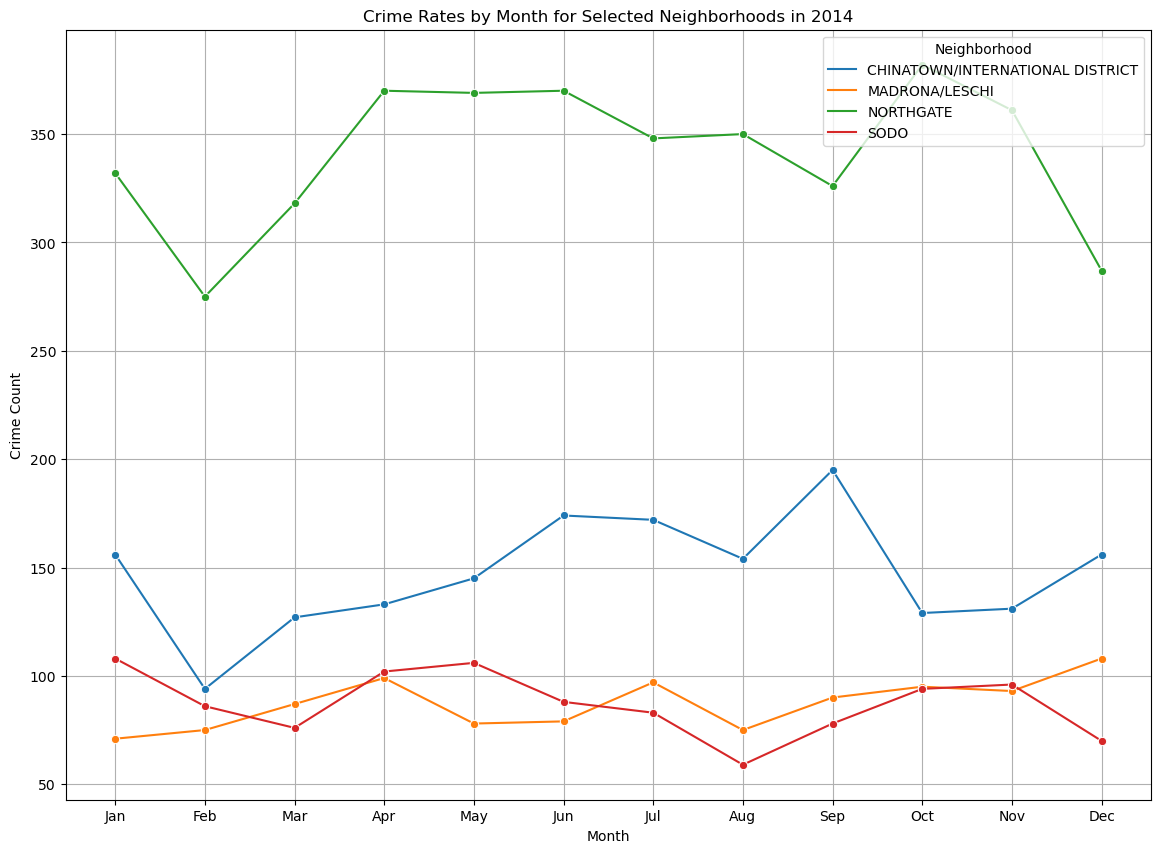

In [63]:
# Define the neighborhoods you are interested in
neighborhoods_of_interest = ['MADRONA/LESCHI', 'NORTHGATE', 'CHINATOWN/INTERNATIONAL DISTRICT', 'SODO']

# Filter the data for these neighborhoods
crime_rates_2014_filtered = crime_rates_2014[crime_rates_2014['mcpp'].isin(neighborhoods_of_interest)]

# Group by neighborhood and month
crime_rates_2014_grouped = crime_rates_2014_filtered.groupby(['mcpp', 'month'])['crime_count'].sum().reset_index()

# Plot the data
plt.figure(figsize=(14, 10))

# Plot 2014 data for selected neighborhoods
sns.lineplot(data=crime_rates_2014_grouped, x='month', y='crime_count', hue='mcpp', marker='o')

plt.title('Crime Rates by Month for Selected Neighborhoods in 2014')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Neighborhood', loc='upper right')
plt.grid(True)
plt.show()


/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_c

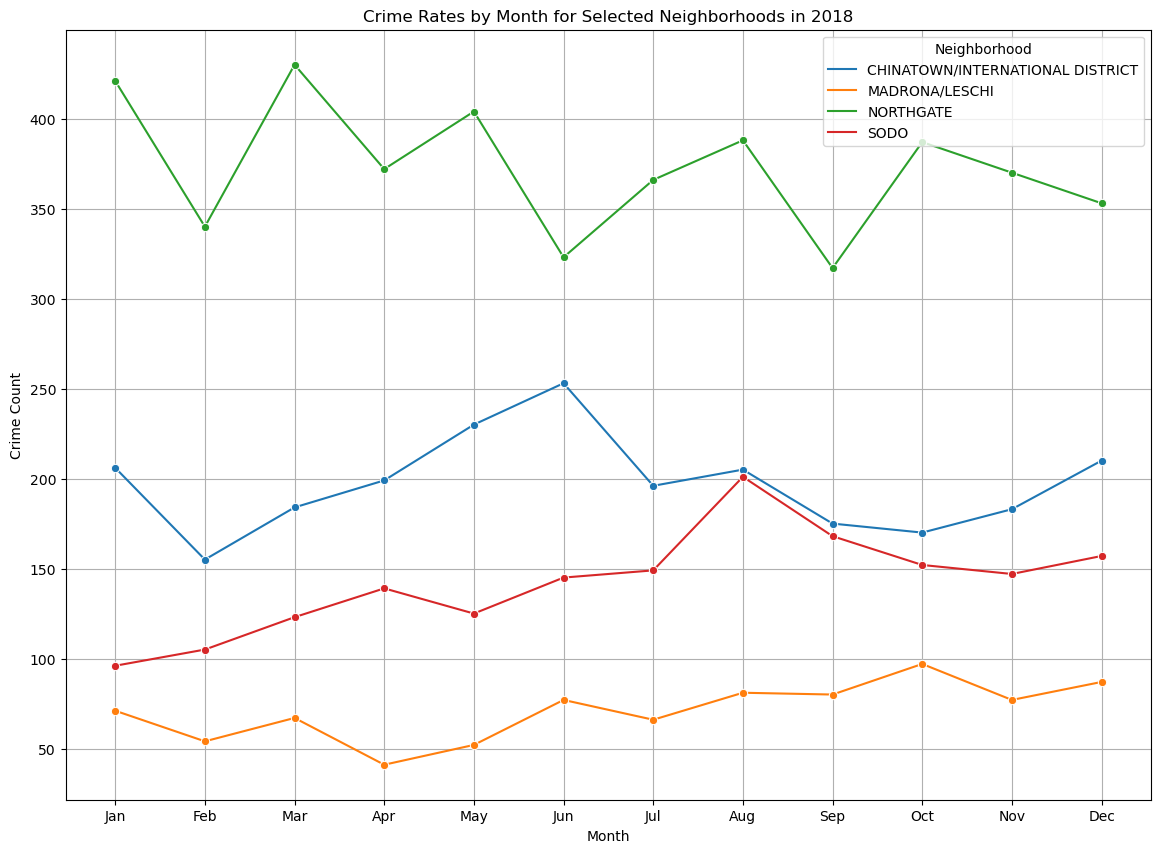

In [64]:
# Define the neighborhoods you are interested in
neighborhoods_of_interest = ['MADRONA/LESCHI', 'NORTHGATE', 'CHINATOWN/INTERNATIONAL DISTRICT', 'SODO']

# Filter the data for these neighborhoods
crime_rates_2018_filtered = crime_rates_2018[crime_rates_2018['mcpp'].isin(neighborhoods_of_interest)]

# Group by neighborhood and month
crime_rates_2018_grouped = crime_rates_2018_filtered.groupby(['mcpp', 'month'])['crime_count'].sum().reset_index()

# Plot the data
plt.figure(figsize=(14, 10))

# Plot 2014 data for selected neighborhoods
sns.lineplot(data=crime_rates_2018_grouped, x='month', y='crime_count', hue='mcpp', marker='o')

plt.title('Crime Rates by Month for Selected Neighborhoods in 2018')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Neighborhood', loc='upper right')
plt.grid(True)
plt.show()


In [65]:
# Sort the dataframe by mcpp, year, and month
crime_df_sorted = crime_rates.sort_values(by=['mcpp', 'year', 'month'])

# Group by mcpp and aggregate crime_count
crime_rates_sorted = crime_df_sorted.groupby(['mcpp', 'year', 'month'], as_index=False)['crime_count'].sum()

# Optionally, if you want to reset index for a cleaner output
crime_rates_sorted = crime_rates_sorted.reset_index(drop=True)

# Display the sorted and aggregated dataframe
print(crime_rates_sorted)

                  mcpp  year  month  crime_count
0               <Null>  2022      6            1
1      ALASKA JUNCTION  2000      1            1
2      ALASKA JUNCTION  2000     10            1
3      ALASKA JUNCTION  2001     11            1
4      ALASKA JUNCTION  2002     12            1
...                ...   ...    ...          ...
12740      WALLINGFORD  2024      3           75
12741      WALLINGFORD  2024      4           83
12742      WALLINGFORD  2024      5           73
12743      WALLINGFORD  2024      6           90
12744      WALLINGFORD  2024      7            3

[12745 rows x 4 columns]


/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_c

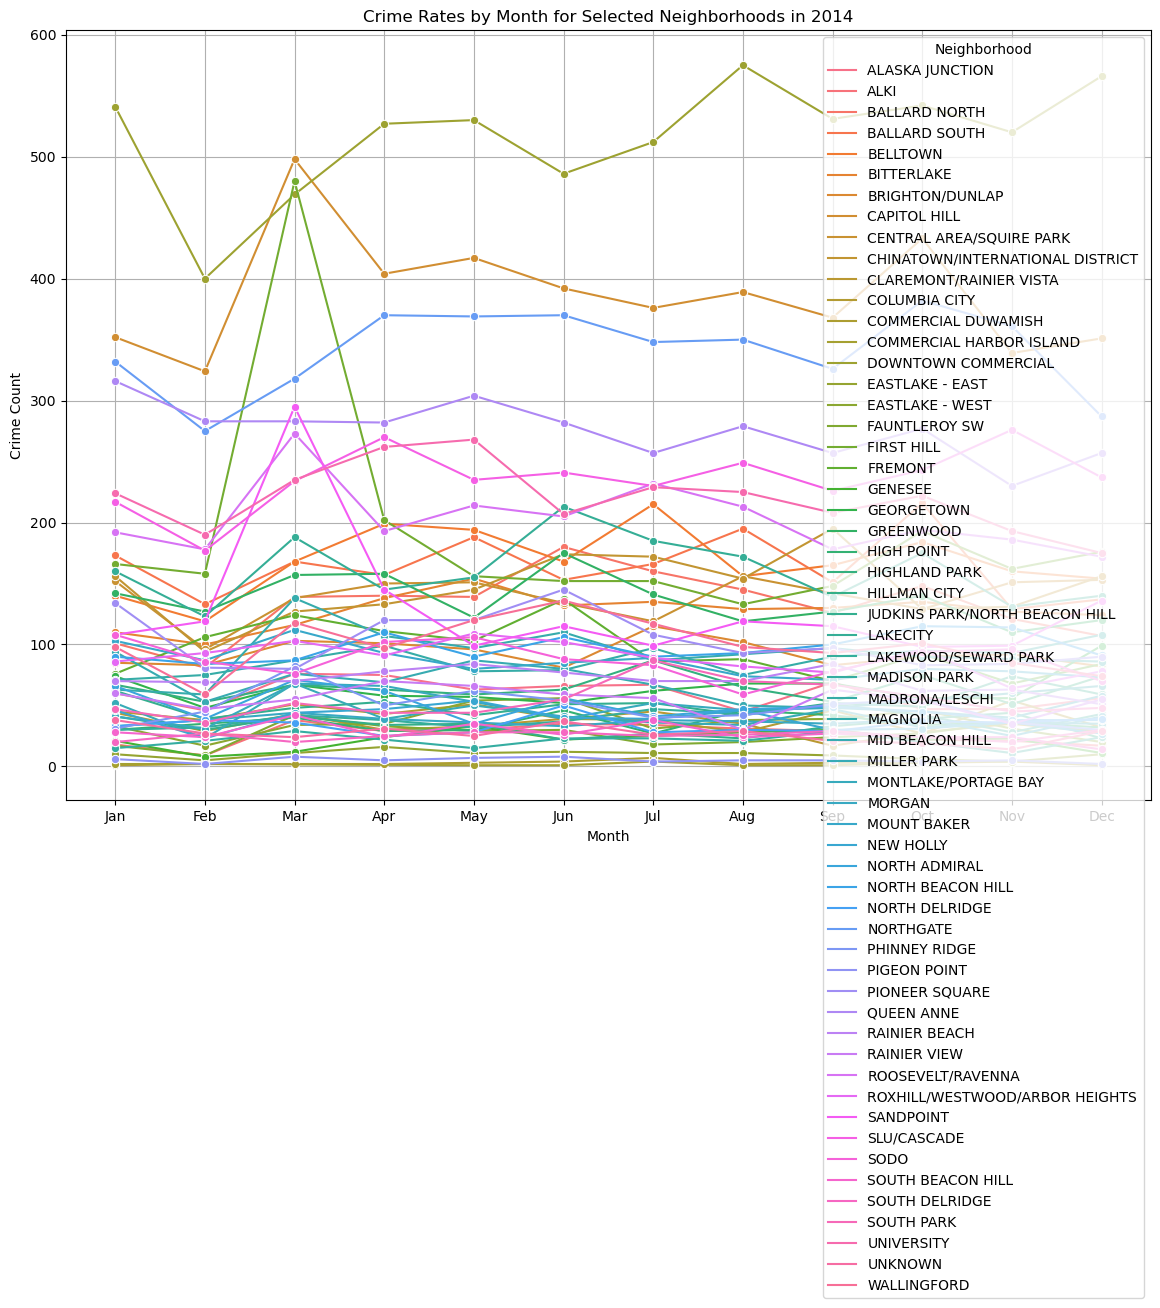

In [66]:
neighborhoods_of_interest = ['MAGNOLIA', 'ROOSEVELT/RAVENNA', 'BALLARD SOUTH',
       'DOWNTOWN COMMERCIAL', 'PHINNEY RIDGE',
       'ROXHILL/WESTWOOD/ARBOR HEIGHTS', 'NORTHGATE', 'CAPITOL HILL',
       'UNIVERSITY', 'COLUMBIA CITY', 'NORTH BEACON HILL', 'FIRST HILL',
       'GEORGETOWN', 'QUEEN ANNE', 'SODO', 'CENTRAL AREA/SQUIRE PARK',
       'MID BEACON HILL', 'ALASKA JUNCTION', 'FREMONT', 'NORTH ADMIRAL',
       'SLU/CASCADE', 'CHINATOWN/INTERNATIONAL DISTRICT', 'SANDPOINT',
       'HILLMAN CITY', 'HIGH POINT', 'MOUNT BAKER', 'HIGHLAND PARK',
       'BITTERLAKE', 'BELLTOWN', 'PIONEER SQUARE',
       'JUDKINS PARK/NORTH BEACON HILL', 'MADRONA/LESCHI', 'MADISON PARK',
       'NORTH DELRIDGE', 'CLAREMONT/RAINIER VISTA', 'RAINIER VIEW',
       'MONTLAKE/PORTAGE BAY', 'LAKEWOOD/SEWARD PARK', 'SOUTH DELRIDGE',
       'WALLINGFORD', 'SOUTH BEACON HILL', 'NEW HOLLY', 'GREENWOOD',
       'BALLARD NORTH', 'PIGEON POINT', 'MORGAN', 'BRIGHTON/DUNLAP',
       'MILLER PARK', 'EASTLAKE - WEST', 'RAINIER BEACH', 'SOUTH PARK',
       'ALKI', 'FAUNTLEROY SW', 'GENESEE', 'COMMERCIAL HARBOR ISLAND',
       'EASTLAKE - EAST', 'COMMERCIAL DUWAMISH', 'UNKNOWN', 'LAKECITY',
       '<Null>', 'CASE/CASCAD', 'CHINATOWN/INTERNAITONAL DISTRICT']

# Filter the data for these neighborhoods
crime_rates_2014_filtered = crime_rates_2014[crime_rates_2014['mcpp'].isin(neighborhoods_of_interest)]

# Group by neighborhood and month
crime_rates_2014_grouped = crime_rates_2014_filtered.groupby(['mcpp', 'month'])['crime_count'].sum().reset_index()

# Plot the data
plt.figure(figsize=(14, 10))

# Plot 2014 data for selected neighborhoods
sns.lineplot(data=crime_rates_2014_grouped, x='month', y='crime_count', hue='mcpp', marker='o')

plt.title('Crime Rates by Month for Selected Neighborhoods in 2014')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Neighborhood', loc='upper right')
plt.grid(True)
plt.show()

In [73]:
crime_rates

,mcpp,year,month,crime_count
0,<Null>,2022,6,1
1,ALASKA JUNCTION,2000,1,1
2,ALASKA JUNCTION,2000,10,1
3,ALASKA JUNCTION,2001,11,1
4,ALASKA JUNCTION,2002,12,1
...,...,...,...,...
12740,WALLINGFORD,2024,3,75
12741,WALLINGFORD,2024,4,83
12742,WALLINGFORD,2024,5,73
12743,WALLINGFORD,2024,6,90


In [74]:
# Aggregiere die Kriminalitätsraten pro Jahr und MCPP
crime_rates_yearly = crime_rates.groupby(['mcpp', 'year'])['crime_count'].sum().reset_index()

# Berechne die durchschnittliche jährliche Zunahme der Kriminalitätsraten
crime_rates_pivot = crime_rates_yearly.pivot(index='mcpp', columns='year', values='crime_count').fillna(0)
crime_rates_pivot['annual_increase'] = crime_rates_pivot.diff(axis=1).mean(axis=1)

# Finde die MCPPs mit den höchsten und niedrigsten durchschnittlichen jährlichen Zunahmen
highest_increase = crime_rates_pivot.nlargest(3, 'annual_increase')
lowest_increase = crime_rates_pivot.nsmallest(3, 'annual_increase')

print("Three MCPPs with the highest average annual increase in crime from 2014 to 2022:")
print(highest_increase)

print("\nThree MCPPs with the lowest average annual increase in crime from 2014 to 2022:")
print(lowest_increase)

Three MCPPs with the highest average annual increase in crime from 2014 to 2022:
year                 1908  1915  1920  1929  1934  1951  1953  1957  1960  \
mcpp                                                                        
CAPITOL HILL          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
QUEEN ANNE            0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
DOWNTOWN COMMERCIAL   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

year                 1964  ...    2016    2017    2018    2019    2020  \
mcpp                       ...                                           
CAPITOL HILL          0.0  ...  4537.0  4770.0  4722.0  4286.0  4473.0   
QUEEN ANNE            1.0  ...  3333.0  3547.0  3701.0  3790.0  4466.0   
DOWNTOWN COMMERCIAL   0.0  ...  6293.0  7051.0  6987.0  6151.0  4066.0   

year                   2021    2022    2023    2024  annual_increase  
mcpp                                                                  
CAPITOL HILL        

In [77]:

# Filter data for the years 2014 to 2022
crime_rates_filtered = crime_rates[(crime_rates['year'] >= 2014) & (crime_rates['year'] <= 2022)]

# Aggregate the crime data by year for each MCPP
crime_rates_grouped = crime_rates_filtered.groupby(['mcpp', 'year'])['crime_count'].sum().reset_index()

# Function to calculate the trend for each MCPP
def calculate_trend(mcpp_data):
    slope, intercept, r_value, p_value, std_err = linregress(mcpp_data['year'], mcpp_data['crime_count'])
    return slope

# Calculate the trend for each MCPP
mcpp_trends = crime_rates_grouped.groupby('mcpp').apply(calculate_trend).reset_index()
mcpp_trends.columns = ['mcpp', 'trend']

# Find the three MCPPs with the highest trend in crime
highest_trends = mcpp_trends.nlargest(3, 'trend')

# Find the three MCPPs with the lowest trend in crime
lowest_trends = mcpp_trends.nsmallest(3, 'trend')

print("Three MCPPs with the highest trend in crime from 2014 to 2022:")
print(highest_trends)

print("\nThree MCPPs with the lowest trend in crime from 2014 to 2022:")
print(lowest_trends)


Three MCPPs with the highest trend in crime from 2014 to 2022:
             mcpp       trend
46     QUEEN ANNE  135.366667
4   BALLARD SOUTH  121.633333
58        UNKNOWN  111.400000

Three MCPPs with the lowest trend in crime from 2014 to 2022:
                   mcpp       trend
15  DOWNTOWN COMMERCIAL -309.266667
23            GREENWOOD  -40.016667
45       PIONEER SQUARE  -37.150000


/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [71]:
# Merge the two DataFrames on 'mcpp'
merged_crime_rates = pd.merge(crime_rates_2014_grouped, crime_rates_2022_grouped, on='mcpp', suffixes=('_2014', '_2022'))

# Calculate the difference in crime counts between 2022 and 2014
merged_crime_rates['crime_increase'] = merged_crime_rates['crime_count_2022'] - merged_crime_rates['crime_count_2014']

# Find the three MCPPs with the highest increase in crime
highest_increase = merged_crime_rates.nlargest(3, 'crime_increase')

# Find the three MCPPs with the lowest increase in crime
lowest_increase = merged_crime_rates.nsmallest(3, 'crime_increase')

print("Three MCPPs with the highest increase in crime from 2014 to 2022:")
print(highest_increase)

print("\nThree MCPPs with the lowest increase in crime from 2014 to 2022:")
print(lowest_increase)


Three MCPPs with the highest increase in crime from 2014 to 2022:
              mcpp  month_2014  crime_count_2014  month_2022  \
6555    QUEEN ANNE          11               230          12   
1026  CAPITOL HILL           2               324           7   
6554    QUEEN ANNE          11               230          11   

      crime_count_2022  crime_increase  
6555               399             169  
1026               487             163  
6554               391             161  

Three MCPPs with the lowest increase in crime from 2014 to 2022:
            mcpp  month_2014  crime_count_2014  month_2022  crime_count_2022  \
2570  FIRST HILL           3               480          11               161   
2571  FIRST HILL           3               480          12               164   
2563  FIRST HILL           3               480           4               176   

      crime_increase  
2570            -319  
2571            -316  
2563            -304  


In [69]:
# Assuming crime_rates is your DataFrame
# Verify the DataFrame
#print(crime_rates.columns)
print(crime_rates.head())

              mcpp  year  month  crime_count
0           <Null>  2022      6            1
1  ALASKA JUNCTION  2000      1            1
2  ALASKA JUNCTION  2000     10            1
3  ALASKA JUNCTION  2001     11            1
4  ALASKA JUNCTION  2002     12            1


In [70]:
# Filter the data for the years 2014 to 2022
filtered_df = crime_rates[(crime_rates['year'] >= 2014) & (crime_rates['year'] <= 2022)]

# Drop rows where 'crime_count' is null
filtered_df = filtered_df.dropna(subset=['crime_count'])

# Ensure 'crime_count' is of numeric type
filtered_df['crime_count'] = pd.to_numeric(filtered_df['crime_count'], errors='coerce')

# Group by mcpp and year, then sum the crime counts
grouped_df = filtered_df.groupby(['mcpp', 'year'])['crime_count'].sum().reset_index()

# Pivot the data to have years as columns
pivot_df = grouped_df.pivot(index='mcpp', columns='year', values='crime_count').fillna(0)

# Calculate the increase in crime from 2014 to 2022
pivot_df['increase'] = pivot_df[2022] - pivot_df[2014]

# Sort by the increase and get the top 2 MCPPs
top_mcpps = pivot_df.sort_values(by='increase', ascending=False).head(2)

print(top_mcpps)


year          2014    2015    2016    2017    2018    2019    2020    2021  \
mcpp                                                                         
QUEEN ANNE  3307.0  3399.0  3333.0  3547.0  3701.0  3790.0  4466.0  3774.0   
UNKNOWN      320.0   322.0   406.0   659.0   672.0   451.0  1110.0   878.0   

year          2022  increase  
mcpp                          
QUEEN ANNE  4429.0    1122.0  
UNKNOWN     1274.0     954.0  
